## 타이타닉호 생존률 분석

### 상관분석, 상관계수, 피어슨 상관계수, 히트맵

#### 데이터 셋 수집

#### 기본 패키지 import

In [48]:
import seaborn as sns
import pandas as pd

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.to_csv('./data/titanic.csv', index=True, encoding='utf-8')

#### 결측치 파악

In [4]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### age 결측치(177건)를 치환

- 891명의 데이터에서 중앙값을 찾아서 결측치를 치환

In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 중앙값
median = titanic.age.median()
median

28.0

In [9]:
titanic.age.mean()

29.69911764705882

In [11]:
# 나이 결측치 치환
titanic['age'] = titanic['age'].fillna(median)

In [12]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# 승선 장소 확인
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [14]:
# 승선 장소 대부분이 'S'이기 때문에, 결측치 2개도 'S'로 할당함
titanic.embarked = titanic.embarked.fillna('S')

In [15]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [16]:
titanic.embark_town = titanic.embark_town.fillna('Southampton')

In [17]:
## 승선 데크를 확인
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [18]:
titanic.deck = titanic.deck.fillna('C')

In [19]:
# 결측치 여부 재조회
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
 titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [21]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

#### 차트 시각화

In [22]:
import matplotlib.pyplot as plt

##### 성별에 따른 생존률 파이 차트

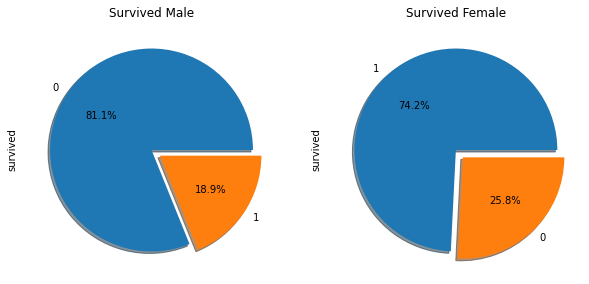

In [36]:
f, ax = plt.subplots(1,2, figsize=(10,5))
titanic.survived[titanic.sex == 'male'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], explode=[0, 0.1], shadow=True)
# (autopct='%1.1f%%)는 비율 표시해줌
# ax=ax[0]는 두개 중에 앞쪽의 그래프에 들어가게 해줌
# explode=[0, 0.1] 는 파이 간격 만들어줌
# shadow=True 는 그림자 만들어 줌
titanic.survived[titanic.sex == 'female'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], explode=[0, 0.1], shadow=True)

ax[0].set_title('Survived Male')
ax[1].set_title('Survived Female')
plt.show()


##### 등급별 생존자 수 차트

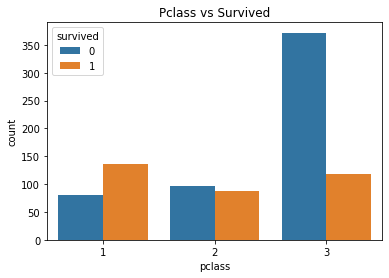

In [39]:
sns.countplot(data=titanic, x='pclass', hue='survived')
plt.title('Pclass vs Survived')
plt.show()

#### 상관분석

#### 상관계수 확인

In [42]:
titanic_corr = titanic.corr(method='pearson')
titanic_corr
# 피어슨 상관계수 만듦

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [43]:
titanic.survived.corr(titanic.adult_male)

-0.5570800422053257

#### 결과 시각화

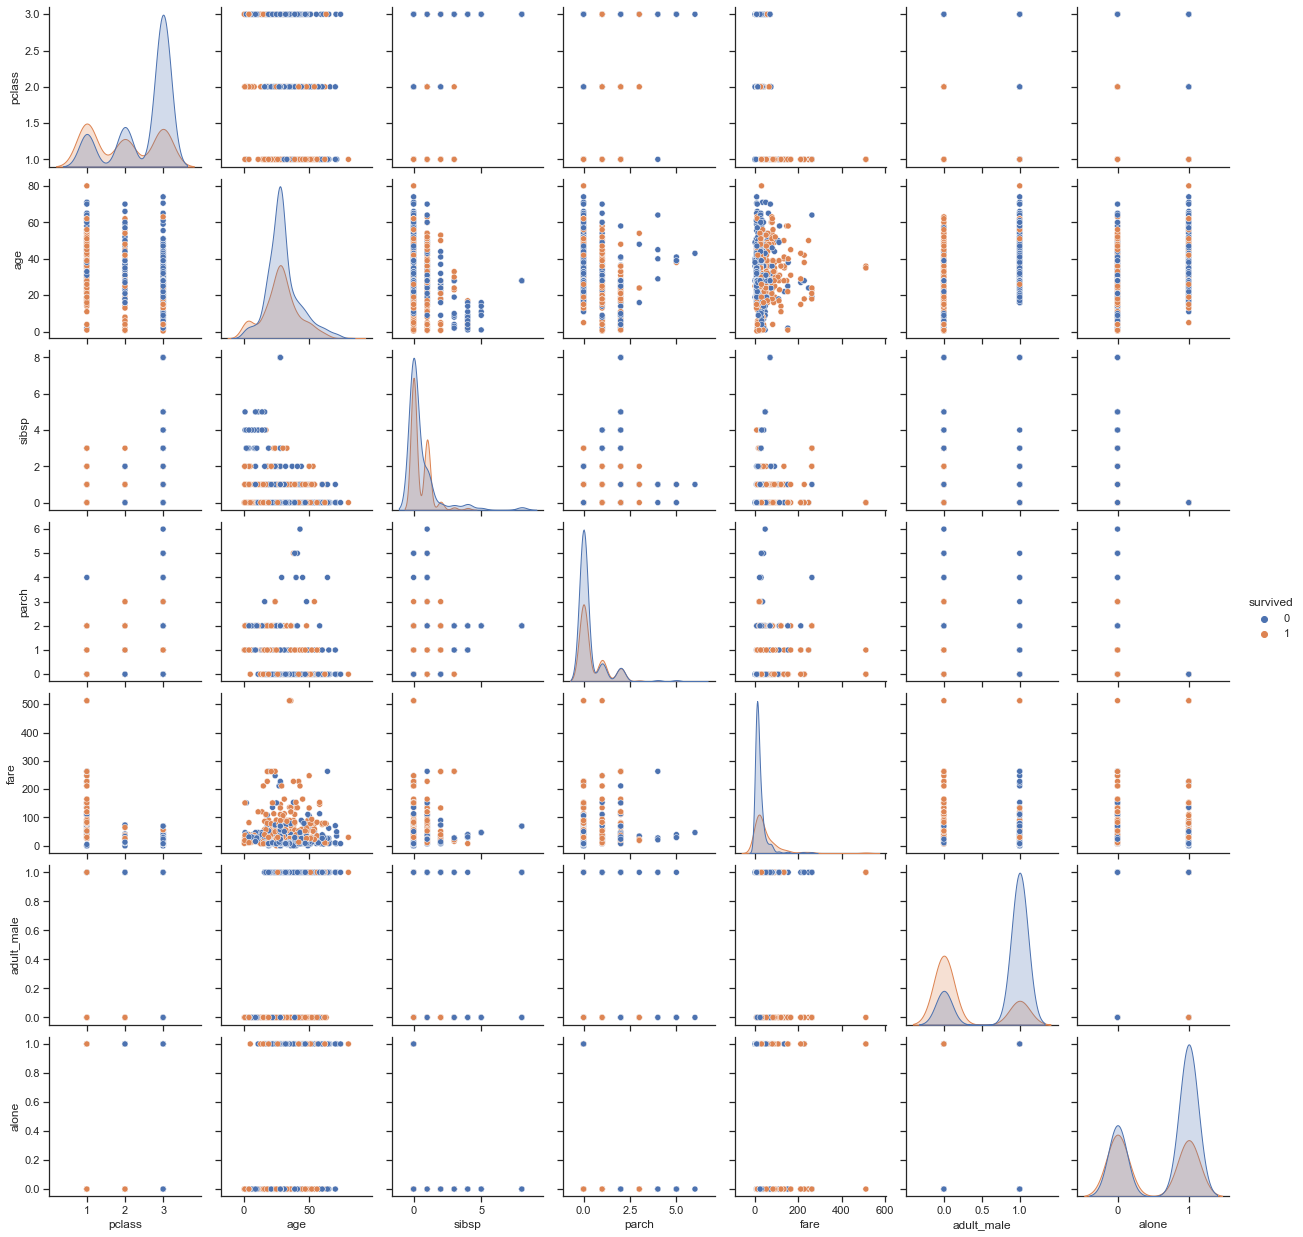

In [50]:
sns.set(style='ticks', color_codes=True)
titanic = titanic.astype({'adult_male':'int32','alone':'int32'})
# adult_male, alone은 bool 타입이라 자꾸 에러 떠서, int로 바꾸는 작업 필요
# bool타입은 산점도에서 오류를 내기 때문에 저 둘이 int로 바꾼 것임
sns.pairplot(titanic, hue='survived', vars=['pclass','age','sibsp','parch','fare','adult_male','alone'])
plt.show()
